<br>
<br>

<p style='color:red;'><b>본 실습 중 다뤄지는 코드의 경우 네이버 뉴스의 정책 및 소스코드 변경에 따라 일부가 정상적으로 작동하지 않을 수 있습니다.</b></p>

In [1]:
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup # HTTP Response -> HTML 

import pandas as pd
from datetime import datetime
import time 
import re

<br>
<br>

## 1. 뉴스 검색 결과에서 네이버뉴스 추려내기

In [2]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query

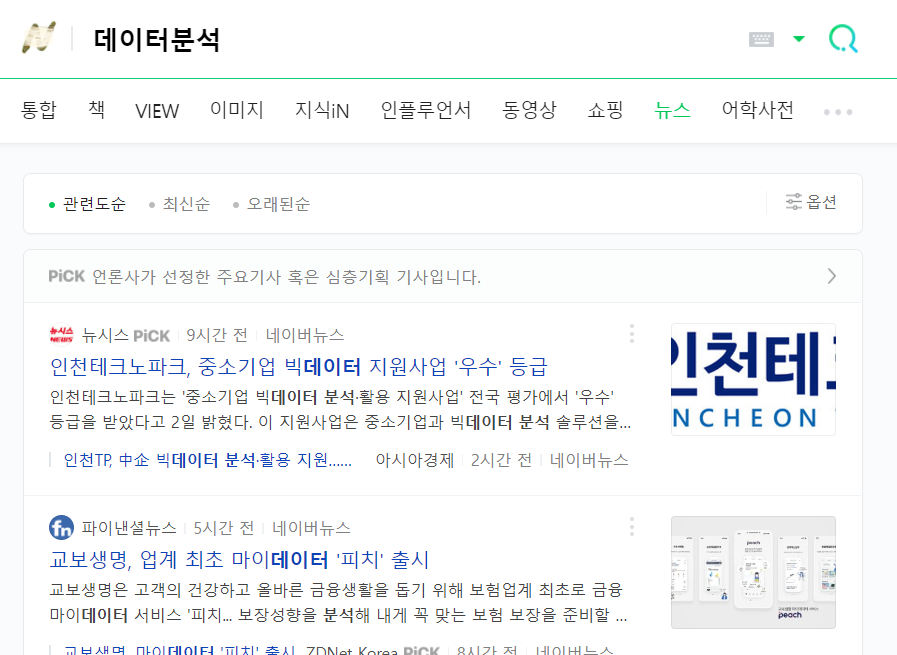

In [ ]:
# web = urlopen(url)
# print(web)

In [ ]:
# web = requests.get(url).content
# print(web)

In [3]:
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')
# print(source) # source를 그대로 출력할 경우, 담고 있는 텍스트가 무척 많아서 버벅이게 될 수 있습니다.

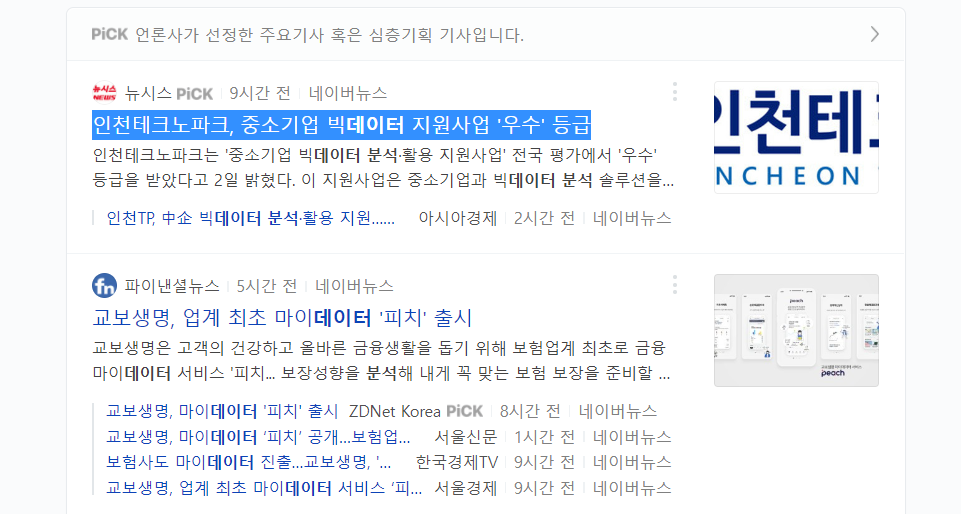

In [ ]:
# 네이버에서 "데이터분석"을 검색한 후 뉴스 탭의 1번째 페이지(위 url 변수의 URL에 해당)에 나타나 있는 뉴스들의 "제목"을 크롤링해주세요. 
# 텍스트만 뽑아내어 하나의 리스트로 모아 저장해주세요. (ex. 위 스크린샷에서 [인천테크노파크, 중소기업 빅데이터 지원사업 '우수' 등급])

news_subjects = source.?(?, {? : ?}) # ResultSet (리스트와 유사한 형태)

subject_list = []

for subject in news_subjects:
    subject_list.?(subject.?())

print(subject_list)

In [ ]:
urls = news_subjects
first_article = urls[0]
first_article.? # tag's attributes (== attrs)

In [ ]:
first_article.?[?] # tag의 attribute 'href'의 value 꺼내기

In [ ]:
for urls in source.find_all('a', {'class' : "news_tit"}):
    print(urls.?[?])

In [ ]:
for urls in source.find_all('a', {'class' : "news_tit"}):
    print(urls[?])

In [ ]:
for urls in source.find_all(?, {? : ?}):
    print(urls.?[?])

In [ ]:
sample_url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=014&aid=0004286058'
sample_url.?('https://news.naver.com/')

In [ ]:
urls_list = []

for urls in source.find_all('a', {'class' : "info"}):
    if urls.attrs["href"].?("https://news.naver.com"): # starts with ~~~
        urls_list.append(urls.attrs["href"])

urls_list

<br>
<br>

## 2. 단일 뉴스 페이지 분석하기

In [ ]:
# # 아래 코드를 실행하면 네이버에서 Bot으로 인식하여 접속을 차단하므로 'ConnectionError'가 발생합니다

# web_news = requests.get(urls_list[0]).content
# source_news = BeautifulSoup(web_news, 'html.parser')

In [ ]:
# 따라서 아래와 같이 코드를 수정하여 크롬브라우저에서 보내는 요청으로 인식하도록 HTTP Request에 Header 정보를 추가해주면 됩니다.
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

web_news = requests.get(urls_list[0], headers=?).content 
source_news = BeautifulSoup(web_news, 'html.parser')

<br>
<br>

#### 1) 기사 제목 & 발행 날짜

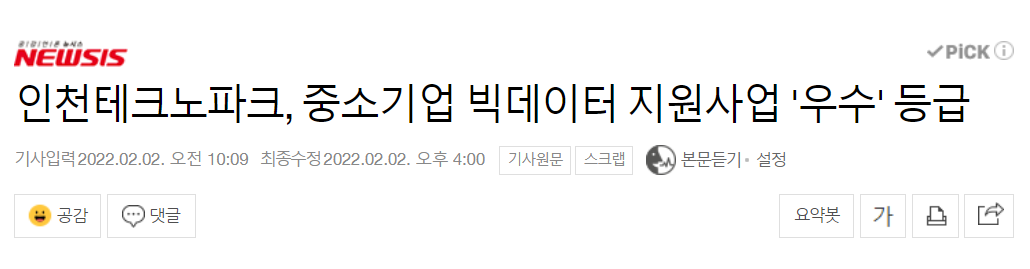

In [ ]:
title = source_news.?('h2', {'class' : 'media_end_head_headline'}).?()
print(title)

In [2]:
date = source_news.?('span', {'class' : 'media_end_head_info_datestamp_time'}).?()
# date = date.replace(" ","")
# date1 = date[:11] # 날짜까지 파싱
# date2 = date[13:] # 시간부분 파싱
# date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])
# date4 = date1 + date2 + date3
# date = pd.Timestamp(date4)
print(date)

In [ ]:
# kor_to_eng = lambda x : 'am' if x == '오전' else 'pm'

In [ ]:
# def kor_to_eng(x):
#     if x == '오전':
#         return 'am'
#     else:
#         return 'pm'

In [ ]:
# date3 = kor_to_eng(date[11:13])

<br>
<br>

#### 2) 기사 본문

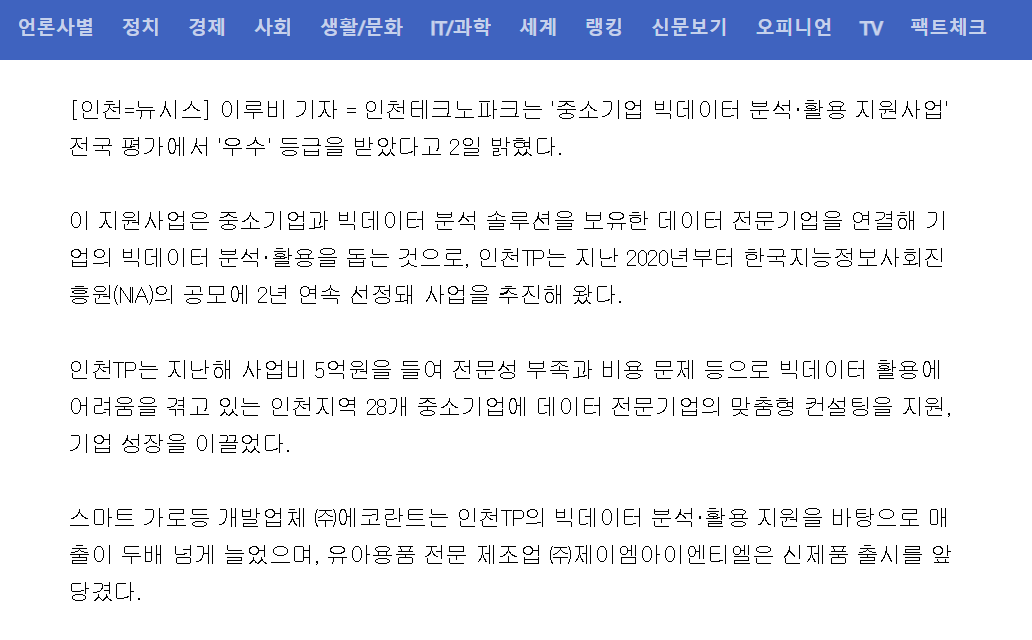

In [ ]:
# ArticleBodyContents -> CamelCase (Python에서는 보통 클래스명에만 사용)
# article_body_contents -> snake_case

article = source_news.find('div', {'id' : 'dic_area'}).get_text()
article
# print(article)

In [ ]:
article = article.?("\n", "") # 교체하다
article = article.?("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
article = article.?("동영상 뉴스       ", "")
article = article.?("동영상 뉴스", "")
article = article.strip()
article

In [ ]:
article

#### (Appendix) 불필요한 기호와 기자 이메일 주소 등 삭제하기 

<br>

- 네이버뉴스 하단의 **기자 정보**가 **byline** div 태그로 분리되면서 아래 정규표현식을 활용한 후처리는 불필요하게 되었습니다.
- 이에 필요 시 샘플 텍스트를 기준으로 설명을 진행합니다.

In [13]:
# news_contents = '[인천=뉴시스] 이루비 기자 =  인천테크노파크 로고. (이미지=인천테크노파크 제공)[인천=뉴시스] 이루비 기자 = 인천테크노파크는 \'중소기업 빅데이터 분석·활용 지원사업\' 전국 평가에서 \'우수\' 등급을 받았다고 2일 밝혔다. 이 지원사업은 중소기업과 빅데이터 분석 솔루션을 보유한 데이터 전문기업을 연결해 기업의 빅데이터 분석·활용을 돕는 것으로, 인천TP는 지난 2020년부터 한국지능정보사회진흥원(NIA)의 공모에 2년 연속 선정돼 사업을 추진해 왔다.인천TP는 지난해 사업비 5억원을 들여 전문성 부족과 비용 문제 등으로 빅데이터 활용에 어려움을 겪고 있는 인천지역 28개 중소기업에 데이터 전문기업의 맞춤형 컨설팅을 지원, 기업 성장을 이끌었다.스마트 가로등 개발업체 ㈜에코란트는 인천TP의 빅데이터 분석·활용 지원을 바탕으로 매출이 두배 넘게 늘었으며, 유아용품 전문 제조업 ㈜제이엠아이엔티엘은 신제품 출시를 앞당겼다. 이사 플랫폼 서비스 제공기업 ㈜모두플랫폼과 공기압 기기 국내 최대 제조업체 ㈜TPC메카트로닉스, 유압 실린더 개발 기업 우영유압㈜은 생산관리 효율성 향상으로 시장경쟁력을 높였다. 운동 어플 서비스 개발업체 ㈜버닛과 AI(인공지능) 기반 폐기물 분류 시스템 개발 기업 ㈜에이트테크는 작업효율 높이면서 투자유치에 성공, 사세 확장을 꾀하고 있다.인천TP 관계자는 "이 지원사업을 통해 기업들이 새로운 비즈니스 기회를 창출하면서 경쟁력을 키워나가고 있다"며 "인천지역 기업들의 데이터 활용 활성화와 비즈니스 모델 전환 등을 지속해서 지원할 계획"이라고 말했다．eswoo@newsis.com▶ 네이버에서 뉴시스 채널 구독하기▶ 뉴시스 빅데이터 MSI 주가시세표 바로가기 <저작권자ⓒ 공감언론 뉴시스통신사. 무단전재-재배포 금지.>'
# news_contents

In [12]:
# import re

# re.match('^[a-zA-Z]+', 'airplane')
# re.match('^[a-zA-Z]+', '?')

In [11]:
# pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@') 
# # [white-space, anti-alphanumeric, lower/upper, numeric] 중에서 0 or more + "@"
# # 정규표현식 추가자료 1) 정규표현식 개념 소개 & 기본 문법 정리 @ https://j.mp/3bJQJHg & https://j.mp/3bLXSqB
# # 정규표현식 추가자료 2) 보다 상세한 설명 & 예제 : http://j.mp/2PzgFO8 & https://hamait.tistory.com/342

# email_address = pattern.search(news_contents)

# print(email_address)
# print(email_address.start())
# print(news_contents[:email_address.start()])

In [10]:
# # 1) "\'" 기호 삭제하기 
# pattern = re.compile(r'\'') 
# news_contents = pattern.sub('', news_contents) # substitute 

# # 2) 기자 이메일 주소부터 그 이후 전체 삭제하기
# pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@')  
# email_address = pattern.search(news_contents)
# news_contents = news_contents[:email_address.start()]

# print(news_contents)

<br>
<br>

#### 3) 기사 발행 언론사

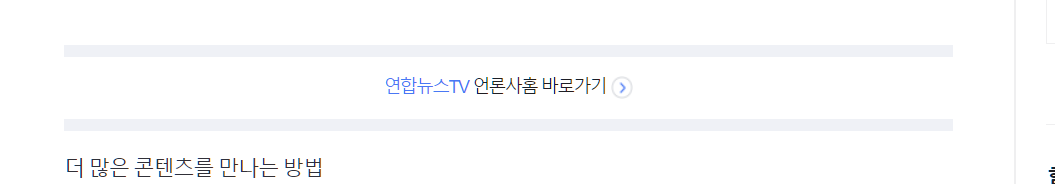

In [ ]:
press_company = source_news.find(?, {'class':'media_end_linked_more_point'}).get_text()
print(press_company)

<br>
<br>

## 3-1. 여러 뉴스 데이터 모으기

In [ ]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []

for urls in source.find_all('a', {'class' : "info"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

urls_list

In [169]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [ ]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []
for urls in source.find_all('a', {'class' : "info"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    web_news = requests.get(url, headers=headers).content
    source_news = BeautifulSoup(web_news, 'html.parser')

    # 2) 기사 제목 
    title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
    titles.append(title)
    print('Processing article : {}'.format(title))
    
    # 3) 기사 날짜
    date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()
    dates.append(date)

    # 4) 기사 본문
    article = source_news.find('div', {'id' : 'dic_area'}).get_text()
    article = article.replace("\n", "")
    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
    article = article.replace("동영상 뉴스       ", "")
    article = article.replace("동영상 뉴스", "")
    article = article.strip()
    articles.append(article)
    
    # 5) 기사 URL 
    article_urls.append(url)
    
    # 6) 기사 발행 언론사
    press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()
    press_companies.append(press_company)

In [ ]:
# 결과 체크 

print(press_companies)

In [ ]:
print(datetime.now())
print(datetime.now().strftime('%y%m%d_%H%M')) # string format time

In [ ]:
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.

article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.?('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## 3-2. 여러 뉴스 데이터 모으기 (특정 뉴스 웹페이지 크롤링 중 에러 발생 시 회피)

In [ ]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []
for urls in source.find_all('a', {'class' : "info"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    ?:
        headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
        web_news = requests.get(url, headers=headers).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        # 2) 기사 제목 
        title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
        print('Processing article : {}'.format(title))

        # 3) 기사 날짜
        date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()

        # 4) 기사 본문
        article = source_news.find('div', {'id' : 'dic_area'}).get_text()
        article = article.replace("\n", "")
        article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
        article = article.replace("동영상 뉴스       ", "")
        article = article.replace("동영상 뉴스", "")
        article = article.strip()
        
        # 5) 기사 발행 언론사
        press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()
        
        # 위 2~5를 통해 성공적으로 제목/날짜/본문/언론사 정보가 모두 추출되었을 때에만 리스트에 추가해 길이를 동일하게 유지해줍니다.
        titles.append(title)
        dates.append(date)
        articles.append(article)
        press_companies.append(press_company)
        article_urls.append(url) # 6) 기사 URL 
    
    ?:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        

# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모아둡니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## 4. 여러 페이지에 걸쳐 크롤링하기

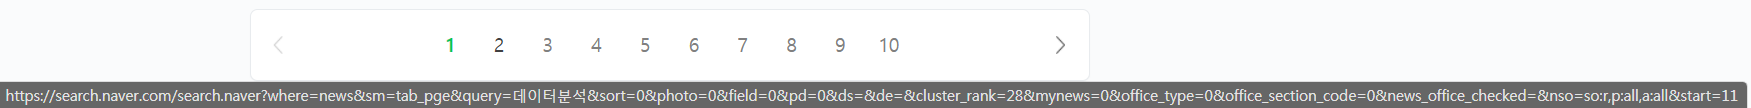

In [ ]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query + ? + ?(11) # 2 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "info"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
        web_news = requests.get(url, headers=headers).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

In [ ]:
query = '데이터분석'
url = "https://search.naver.com/search.naver?where=news&query=" + query + ? + ?(21) # 3 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "info"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
        web_news = requests.get(url, headers=headers).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

In [ ]:
start_points = [ ? ] # 1~5페이지에 해당하는 start point 값(str)을 만드려면?

In [2]:
max_page = 5
start_points = []

for point in range(?): # range(start, stop, step)
    start_points.append(?(point)) 

start_points

In [157]:
query = '데이터분석'
max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [175]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [176]:
# current_call = 1
# last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

# while current_call <= last_call:
#     print(current_call) # 1, 11, 21, 31, 41 
#     current_call += 10

# # current_call 1 <= 41
# # current_call 11 <= 41
# # current_call 21 <= 41
# # current_call 31 <= 41
# # current_call 41 <= 41
# # current_call 51 <= 41 <- False & 종료

In [ ]:
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

? current_call <= last_call: # 조건문이 참인 "동안" 실행
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query + "&start=" + str(current_call)
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "info"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
            web_news = requests.get(url, headers=headers).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()

            article = source_news.find('div', {'id' : 'dic_area'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.replace("동영상 뉴스", "")
            article = article.strip()

            press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    ?.?(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## (Appendix) 날짜 지정하여 크롤링하기

In [193]:
query = '데이터분석'

start_date = '2022.01.01'
end_date = '2022.01.30'

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [ ]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
start_date = start_date.replace(".", "")
end_date = end_date.replace(".", "")

# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
          + "to" + end_date \
          + "%2Ca%3A&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "info"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
            web_news = requests.get(url, headers=headers).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()

            article = source_news.find('div', {'id' : 'dic_area'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.replace("동영상 뉴스", "")
            article = article.strip()

            press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## (Appendix) 기사 정렬 순서 지정하여 크롤링하기

In [198]:
query = '데이터분석'

sort_type = 1 # 관련도순 = 0  최신순 = 1  오래된순 = 2

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [ ]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&sort=" + str(sort_type) \
          + "&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "info"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
            web_news = requests.get(url, headers=headers).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()

            article = source_news.find('div', {'id' : 'dic_area'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.replace("동영상 뉴스", "")
            article = article.strip()

            press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

In [ ]:
# "데이터 분석"이라는 6글자의 문구가 반드시 포함된 문서만 검색하려면?

query = '?데이터 분석?'

<br>
<br>

## (Appendix) 깔끔하게 정리하기

In [213]:
def main_crawling(query, start_date, end_date, sort_type, max_page):
    
    if query == '':
        query = '데이터 분석'
    if len(start_date) != 10:
        start_date = '2021.01.01'
    if len(end_date) != 10:
        end_date = '2021.12.31'
    if sort_type not in ['0', '1', '2']:
        sort_type = '0'
#     if max_page == '':
#         max_page = 5


    # 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
    titles = []
    dates = []
    articles = []
    article_urls = []
    press_companies = []

    # 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
    start_date = start_date.?(".", "")
    end_date = end_date.?(".", "")

    # 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
    current_call = 1
    last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 


    ? current_call <= last_call:

        print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))

        url = "https://search.naver.com/search.naver?where=news&query=" + query \
              + "&sort=" + sort_type \
              + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
              + "to" + end_date \
              + "%2Ca%3A&start=" + str(current_call)

        urls_list = []
        try: # 네이버 뉴스 검색결과 페이지 자체에 접근이 불가능할 경우 에러가 발생할 수 있습니다.
            web = requests.get(url).content
            source = BeautifulSoup(web, 'html.parser')

            for urls in source.find_all('a', {'class' : "info"}):
                if urls["href"].startswith("https://news.naver.com"):
                    urls_list.append(urls["href"])
        except:
            print('해당 뉴스 검색 페이지의 네이버 뉴스 링크를 모으는 중 에러가 발생했습니다. : ', url)
        
        # urls_list : 해당 페이지에 있는 "네이버 뉴스"의 링크 모음(list)
        if urls_list != []:
            for url in urls_list:
                ?: # 특정 뉴스 기사글 하나를 크롤링하는 중 에러가 발생할 수 있습니다.ㄴ
                    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
                    web_news = requests.get(url, headers=headers).content
                    source_news = BeautifulSoup(web_news, 'html.parser')

                    title = source_news.find('h2', {'class' : 'media_end_head_headline'}).get_text()
                    print('Processing article : {}'.format(title))

                    date = source_news.find('span', {'class' : 'media_end_head_info_datestamp_time'}).get_text()

                    article = source_news.find('div', {'id' : 'dic_area'}).get_text()
                    article = article.replace("\n", "")
                    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
                    article = article.replace("동영상 뉴스       ", "")
                    article = article.replace("동영상 뉴스", "")
                    article = article.strip()

                    press_company = source_news.find('em', {'class':'media_end_linked_more_point'}).get_text()

                    titles.append(title)
                    dates.append(date)
                    articles.append(article)
                    press_companies.append(press_company)
                    article_urls.append(url)
                ?:
                    print('\n*** {}번부터 {}번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.'.format(current_call, current_call+9))
                    print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        else:
            pass

        time.sleep(5)
        current_call += 10
            
            
    article_df = pd.DataFrame({'Title':titles, 
                               'Date':dates, 
                               'Article':articles, 
                               'URL':article_urls, 
                               'PressCompany':press_companies})

    article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    
    print('\n크롤링이 성공적으로 완료되었습니다!')
    print('\n크롤링 결과를 다음 파일에 저장하였습니다 : {}'.format(datetime.now().strftime('%y%m%d_%H%M')))

In [ ]:
input()

In [ ]:
input('나이를 적어주세요.')

In [ ]:
age = input("나이를 적어주세요.")
print('나이 x 2는 ', age * 2)

In [ ]:
age = input("나이를 적어주세요.")
type(age)

In [ ]:
age = int(input("나이를 적어주세요."))
print('나이 x 2는 ', age * 2)

In [4]:
age = input() # 아무 내용도 입력하지 않고 enter 시 NoneType이 아닌 ''(str)가 리턴됩니다.
print(type(age))
age # age == ""

In [ ]:
query = input('검색어를 입력해주세요. (ex. 데이터 분석) : ')
start_date = input('검색 시작 날짜를 입력해주세요. (형식 : 2021.01.01) : ')
end_date = input('검색 종료 날짜를 입력해주세요. (형식 : 2021.12.31) : ')
sort_type = input('정렬 타입을 입력해주세요 (관련도순 = 0, 최신순 = 1, 오래된순 = 2) : ')
max_page = input('크롤링을 원하는 전체 페이지 수를 입력해주세요. (ex. 5) : ')

if start_date > end_date:
    print('\n시작 날짜는 종료 날짜보다 이후로 지정하실 수 없습니다. 다시 실행해주세요!')
elif max_page == '':
    max_page = 5
    print('\n원하시는 페이지 수가 입력되지 않았습니다. 5 페이지까지만 크롤링을 진행합니다.')
    main_crawling(query, start_date, end_date, sort_type, max_page)
else:
    max_page = int(max_page)
    main_crawling(query, start_date, end_date, sort_type, max_page)

In [ ]:
df = pd.read_excel('?.xlsx') 
df.head()